In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import pickle

In [2]:
from random import shuffle

In [3]:
from contour_visualization.Gaussian import Gaussian
from contour_visualization import picture_plot
from contour_visualization import color_schemes

from gmm_dimension_reduction.slicing import slice_gmm
from gmm_dimension_reduction import GaussianMixtureModel

No module named 'mb_modelbase'


In [4]:
from sklearn.datasets import make_spd_matrix

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
def get_colors(states, neighbors, colors):
    def promising(state, color):
        for neighbor in neighbors.get(state): 
            color_of_neighbor = colors_of_states.get(neighbor)
            if color_of_neighbor == color:
                return False

        return True

    def get_color_for_state(state, colors):
        shuffle(colors)
        for color in colors:
            if promising(state, color):
                return color
            
    colors_of_states = {}
    for state in states:
        colors_of_states[state] = get_color_for_state(state, colors)
    return colors_of_states

In [7]:
def create_neighbors(means, n_closest):
    neighbors = {}
    
    def pClosest(points, K):
        closest_points = sorted(enumerate(points), key = lambda K: K[1][0]**2 + K[1][1]**2)[1:K+1]
        return [i[0] for i in closest_points]
    
    for i, mean in enumerate(means):
        neighbors[i] = pClosest(means - mean, n_closest)
    return neighbors
        
        

In [8]:
def generate_coloring(means, colors, neighbors=5):
    states = list(range(len(means)))
    neighbors = create_neighbors(means, neighbors)
    return get_colors(states, neighbors, colors)

In [9]:
def generate_random_psd_matrix(matrix_size=2, size=1.0):
    return make_spd_matrix(matrix_size) * np.random.uniform(size/2, size)

In [10]:
def generate_random_mean(mean_size=2, size=1.0):
    return np.random.uniform(-size, size, mean_size)

In [11]:
def change_size(gmm, size=200):
    for gm in gmm:
        gm.size = size

In [12]:
def generate_gaussian(n_components):
    np.random.seed(0)
    matrix = generate_random_psd_matrix(2, 0.5)
    covariances_ = [matrix for i in range(n_components)]
    weights_ = np.random.dirichlet(np.ones(n_components)*1000,size=1)[0]
    # weights_ = [0.5 for i in range(n_components)]
    means_ =  [generate_random_mean(2, 15.0) for i in range(n_components)]
    covariances_ = [generate_random_psd_matrix(2, 3.0) for i in range(n_components)]
    colors = generate_coloring(means_, color_schemes.get_colorbrewer_schemes(), 4)
    gaussian_mixture = [Gaussian(weight=weights ,means=means , cov_matrix=covariances, size=200) for weights, means, covariances in zip(weights_, means_, covariances_)]
    return gaussian_mixture, colors

In [16]:
with open('gmm_mixture.pickle', 'rb') as handle:
    gmm = pickle.load(handle)

In [18]:
with open('means_colors.pickle', 'rb') as handle:
    means_colors = pickle.load(handle)
    means_, colors = means_colors[0], means_colors[1]

In [49]:
gmm_new = change_size(gmm, 1000)

In [53]:
n_components = 40

In [52]:
matrix = generate_random_psd_matrix(2, 0.5)

In [53]:
covariances_ = [matrix for i in range(n_components)]

In [54]:
weights_ = np.random.dirichlet(np.ones(n_components)*1000,size=1)[0]
# weights_ = [0.5 for i in range(n_components)]
means_ =  [generate_random_mean(2, 15.0) for i in range(n_components)]
covariances_ = [generate_random_psd_matrix(2, 3.0) for i in range(n_components)]

In [20]:
gmm = [Gaussian(weight=weights ,means=means , cov_matrix=covariances, size=200) for weights, means, covariances in zip(weights_, means_, covariances_)]

In [41]:
colors = generate_coloring(means_, color_schemes.get_colorbrewer_schemes(), 4)

In [43]:
len(list(colors.values()))

35

In [76]:
dpi=200

In [77]:
ax.set_xlim((-16., 19.))
ax.set_ylim((-17., 17.))

(-17.0, 17.0)

(-19.0, 18.0)

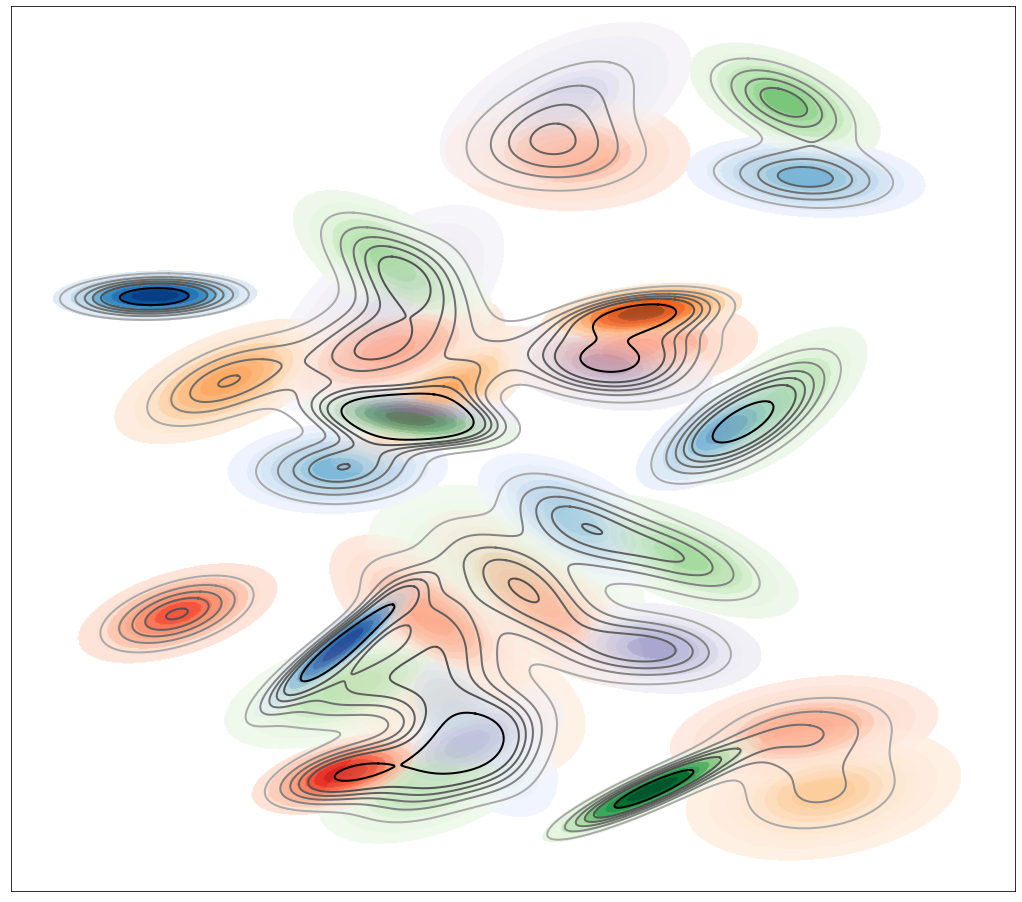

In [78]:
fig_contour, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, contour_colorscheme=list(colors.values()), contours=True, contour_lines=True)
ax.set_xlim((-20.5, 21.5))
ax.set_ylim((-19., 18.))

In [79]:
fig_contour.savefig("35_components_contour.png", dpi=dpi, bbox_inches = 'tight')

(-19.0, 18.0)

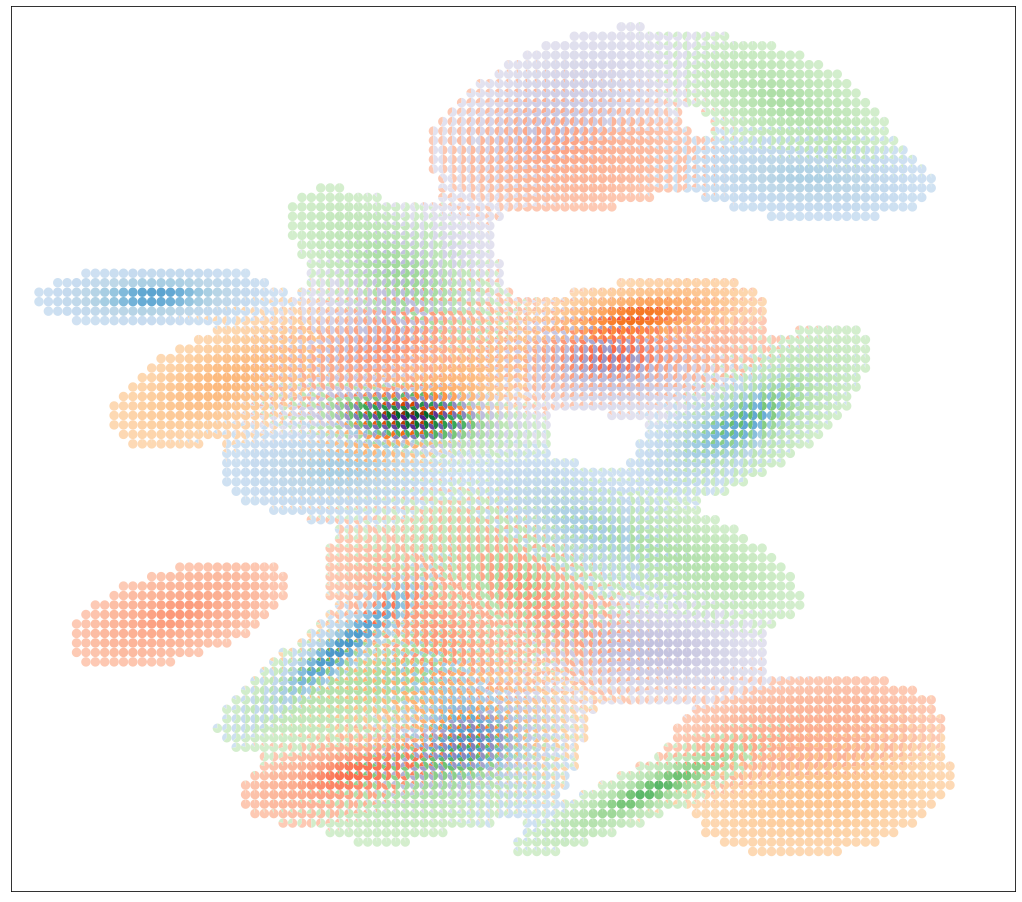

In [80]:
fig_pie, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, pie_chart_colors=list(colors.values()), pie_charts=True, pie_num = 120, pie_angle=90, pie_chart_iso_level=40, pie_chart_contour_method="equal_density", pie_chart_modus="light")
ax.set_xlim((-20.5, 21.5))
ax.set_ylim((-19., 18.))

In [81]:
fig_pie.savefig("35_components_pie.png", dpi=dpi, bbox_inches = 'tight')

points in grid of z-coordinates too similar
points in grid of z-coordinates too similar


(-19.0, 18.0)

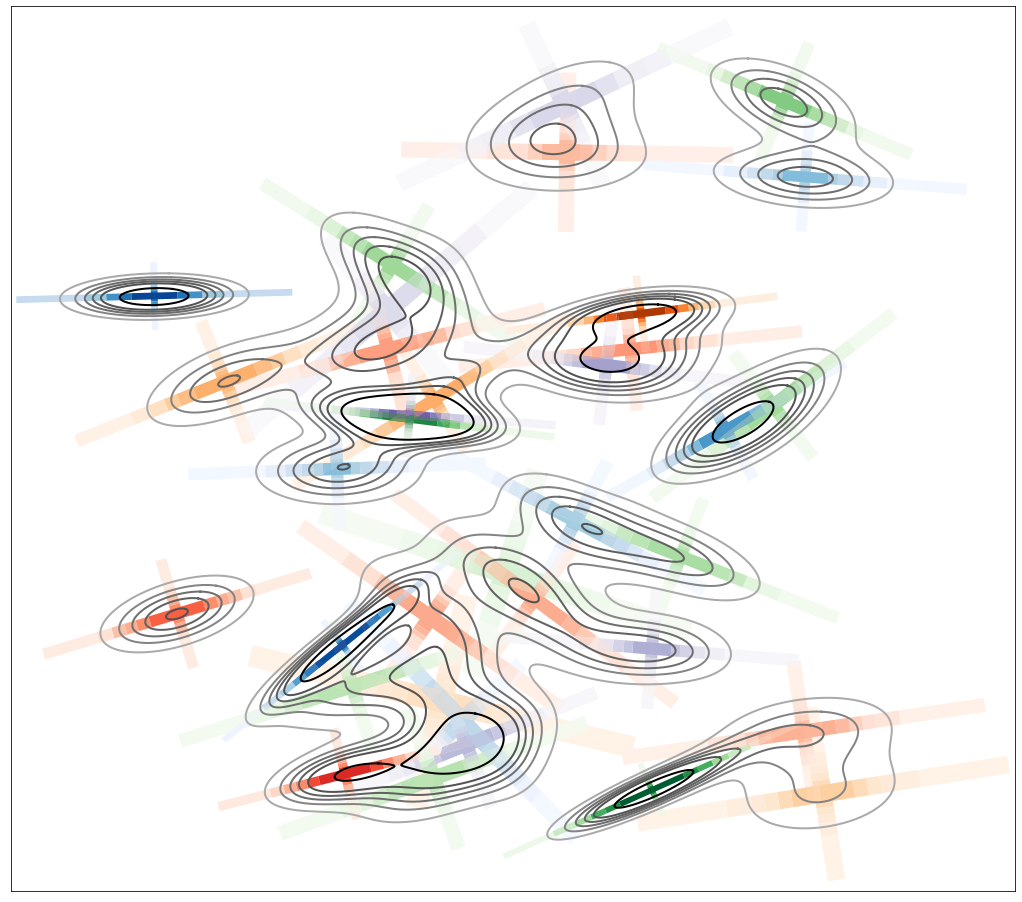

In [82]:
fig_crosses, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, cross_colorscheme=list(colors.values()), crosses=True, contour_lines=True)
ax.set_xlim((-20.5, 21.5))
ax.set_ylim((-19., 18.))

In [83]:
fig_crosses.savefig("35_components_crosses.png", dpi=dpi, bbox_inches = 'tight')

In [25]:
size = 1000

In [26]:
dpi = 500

In [15]:
settings = [{"contours": True, "contour_lines": True}, 
            {"pie_charts": True, "pie_num": 120, "pie_angle": 90, "pie_chart_iso_level": 40, "pie_chart_contour_method": "equal_density", "pie_chart_modus": "light"},
            {"crosses": True, "contour_lines": True}
           ]

In [27]:
# , "pad_inches": 0
fig_settings = {"dpi": dpi, "bbox_inches": 'tight'}

In [40]:
def plot_images(gmm, colors, settings):
    figures = []
    for i in settings:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        picture_plot.plot_image(ax, gmm, contour_colorscheme=list(colors.values()), cross_colorscheme=list(colors.values()), **i)
        ax.set_xlim((-20., 20.))
        ax.set_ylim((-19., 19.))
        figures.append(fig)
        plt.show()
    return figures

In [29]:
def save_images(figures, name, designs=None, **kwargs):
    if designs is None:
        designs = ["contour", "pie", "cross"]
    print(kwargs)
    for fig, design in zip(figures, designs):
        print(f"{name}_{design}.png")
        fig.savefig(f"{name}_{design}.png", **kwargs)

In [30]:
gmm_50, colors_50 = generate_gaussian(50)

In [41]:
change_size(gmm_50, size)

NameError: name 'gmm_50' is not defined

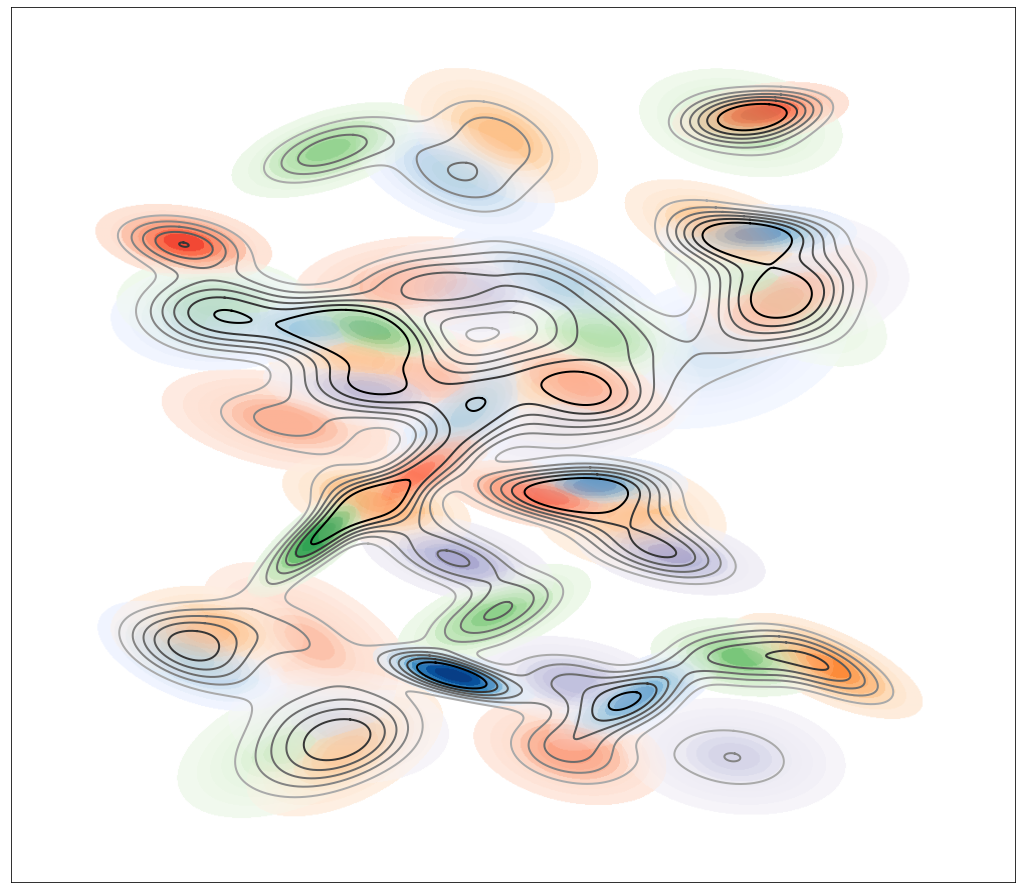

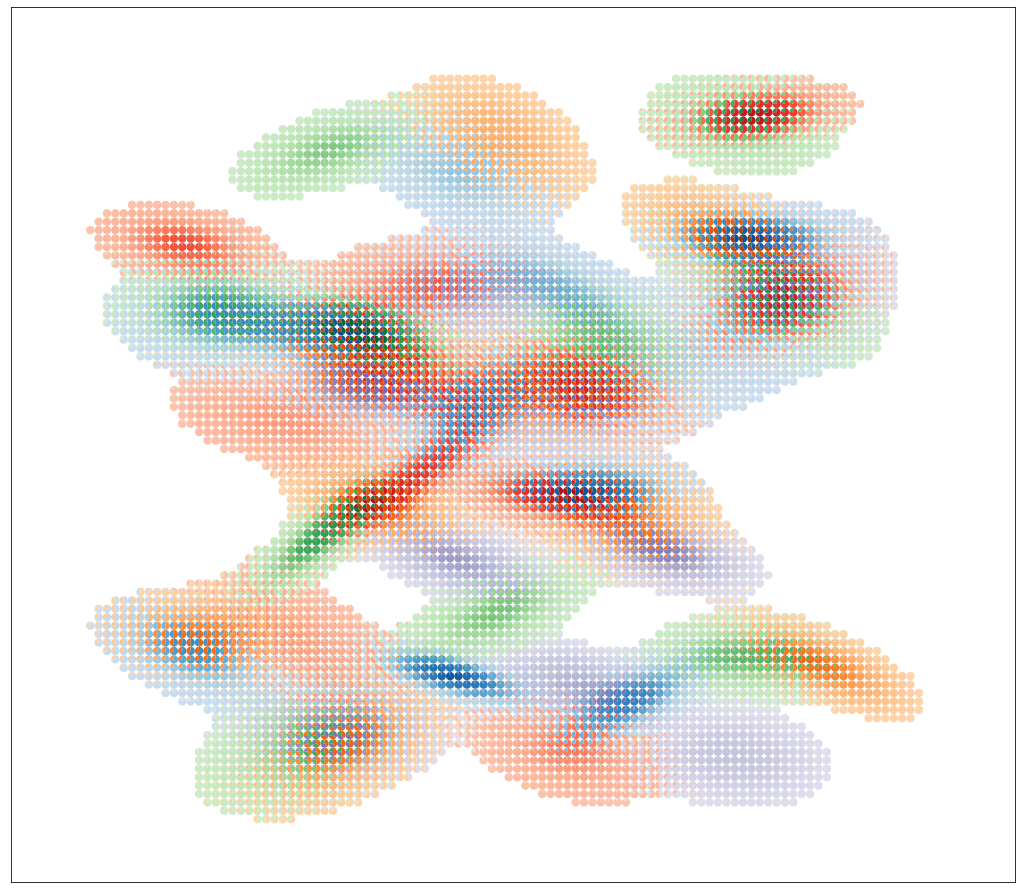

points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar


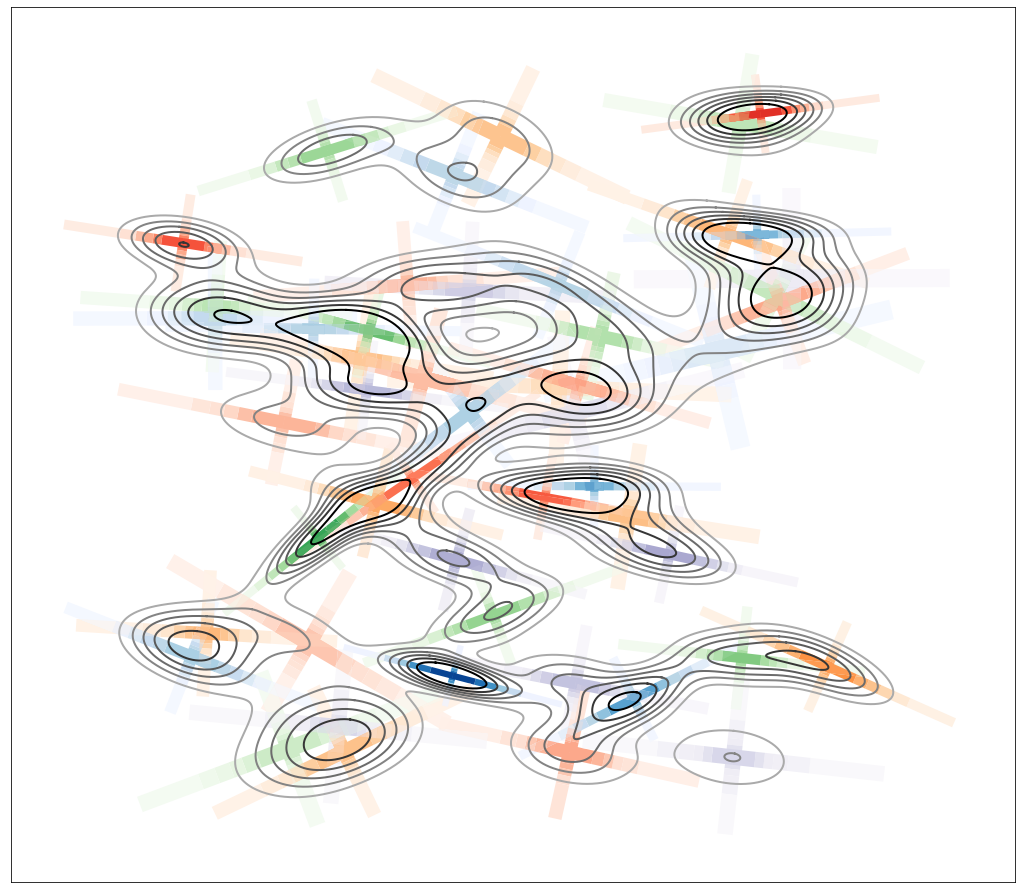

In [32]:
figures_50 = plot_images(gmm_50, colors_50, settings)

In [33]:
save_images(figures_50, "50_components", **fig_settings)

{'dpi': 500, 'bbox_inches': 'tight'}
50_components_contour.png
50_components_pie.png
50_components_cross.png


In [34]:
gmm_25, colors_25 = generate_gaussian(25)

In [35]:
change_size(gmm_25, size)

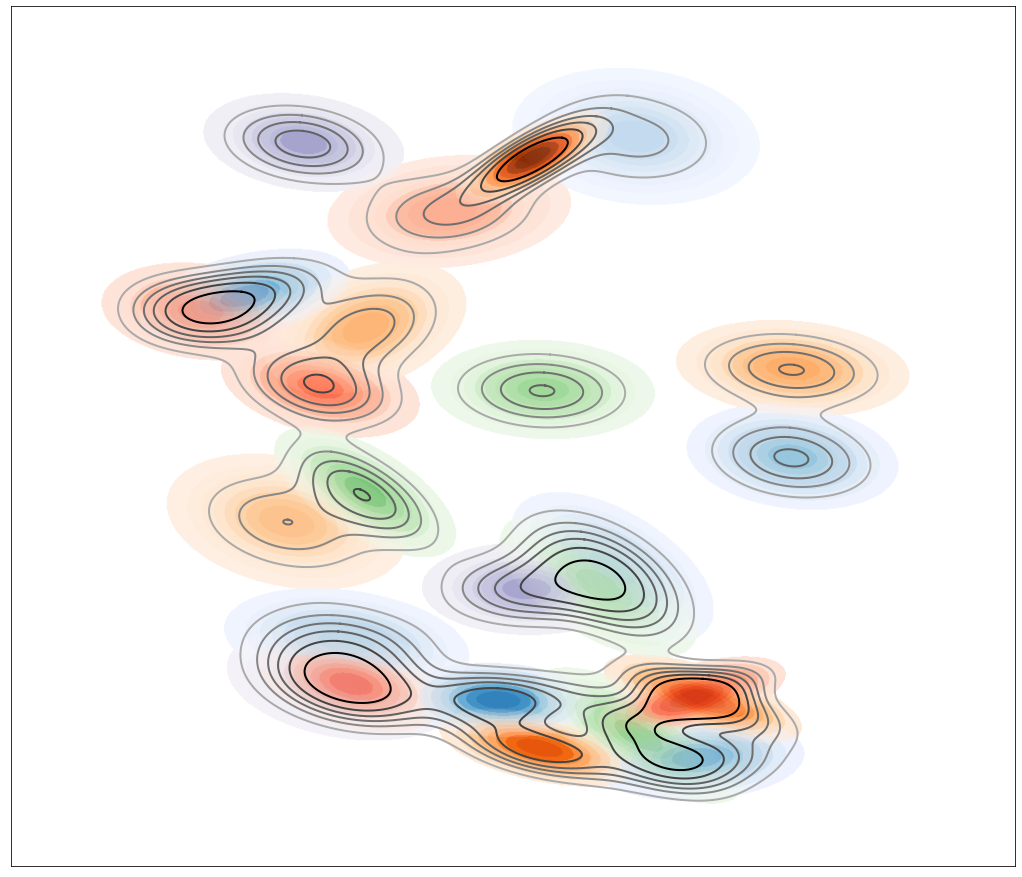

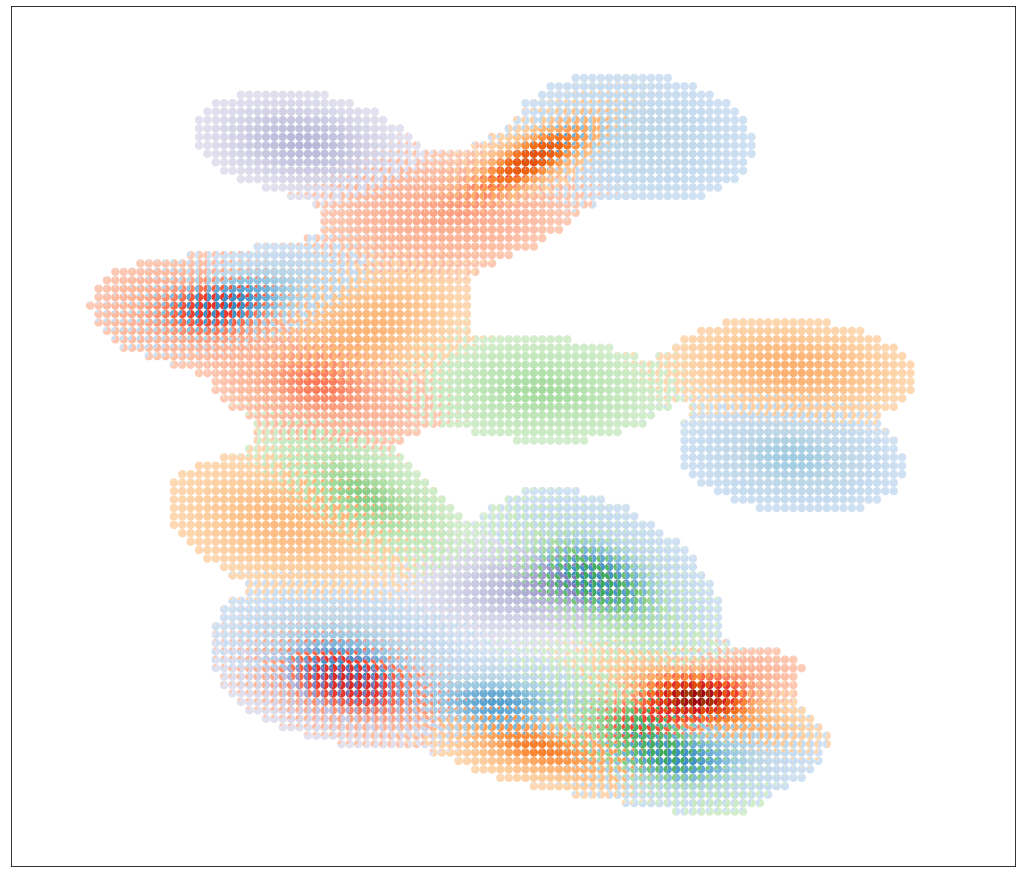

points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar


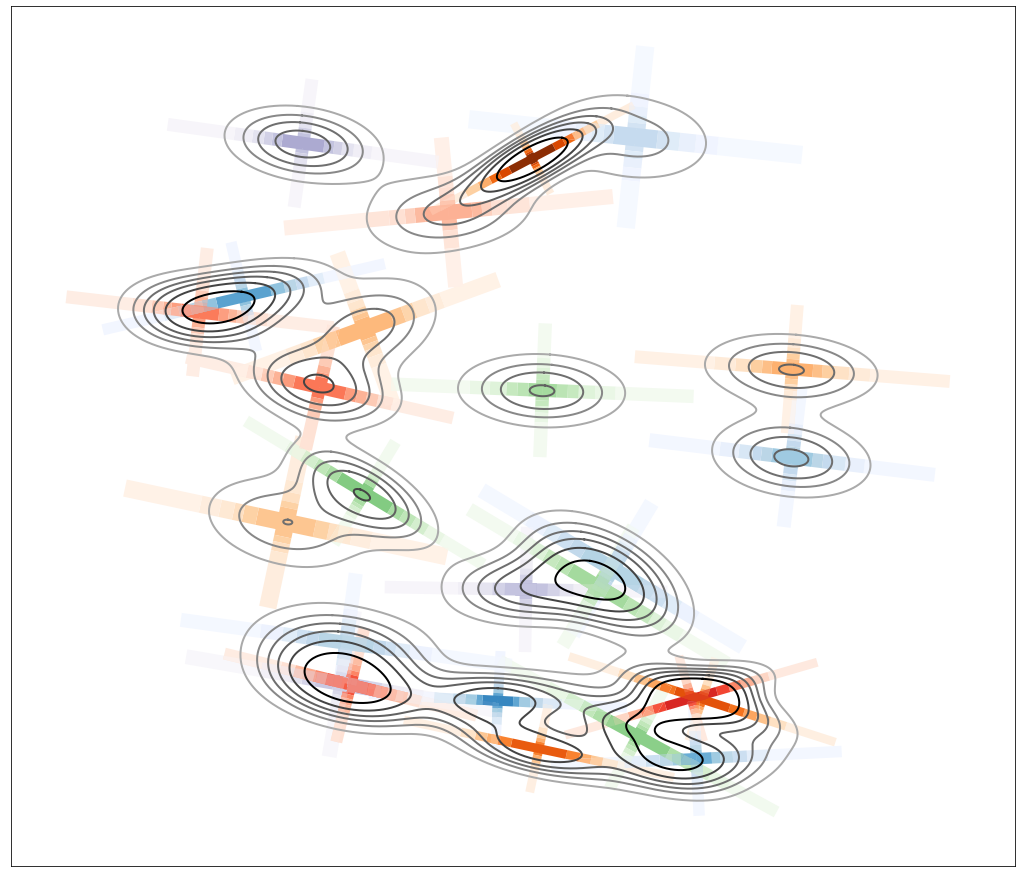

In [36]:
figures_25 = plot_images(gmm_25, colors_25, settings)

In [37]:
save_images(figures_25, "25_components", **fig_settings)

{'dpi': 500, 'bbox_inches': 'tight'}
25_components_contour.png
25_components_pie.png
25_components_cross.png


In [23]:
gmm_15, colors_15 = generate_gaussian(15)

In [24]:
change_size(gmm_15, size)

NameError: name 'size' is not defined

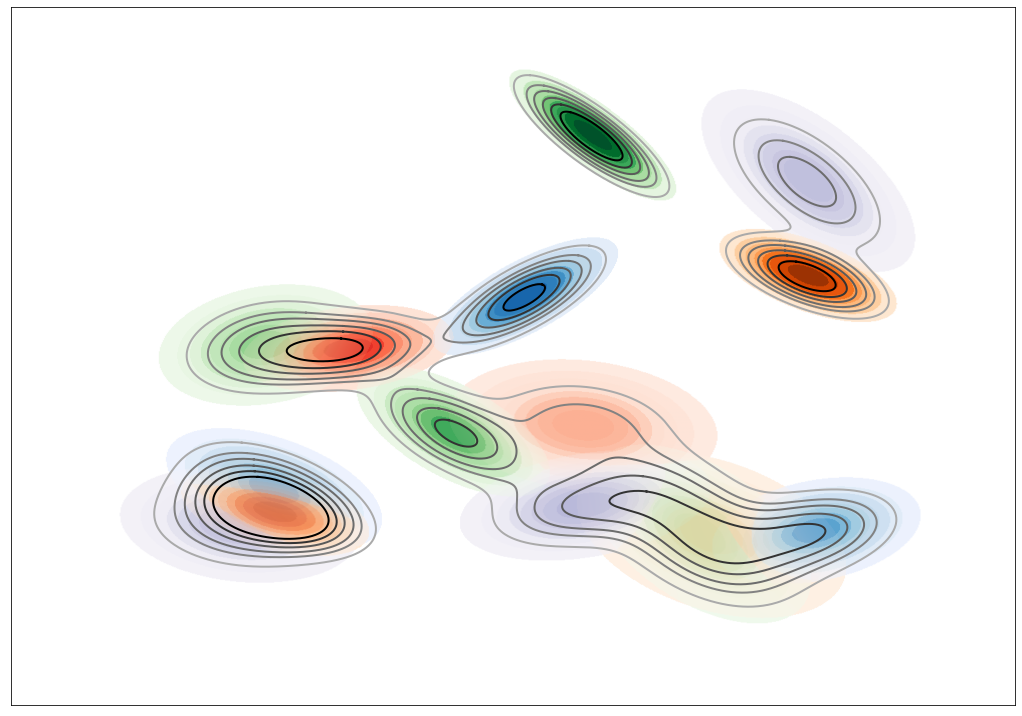

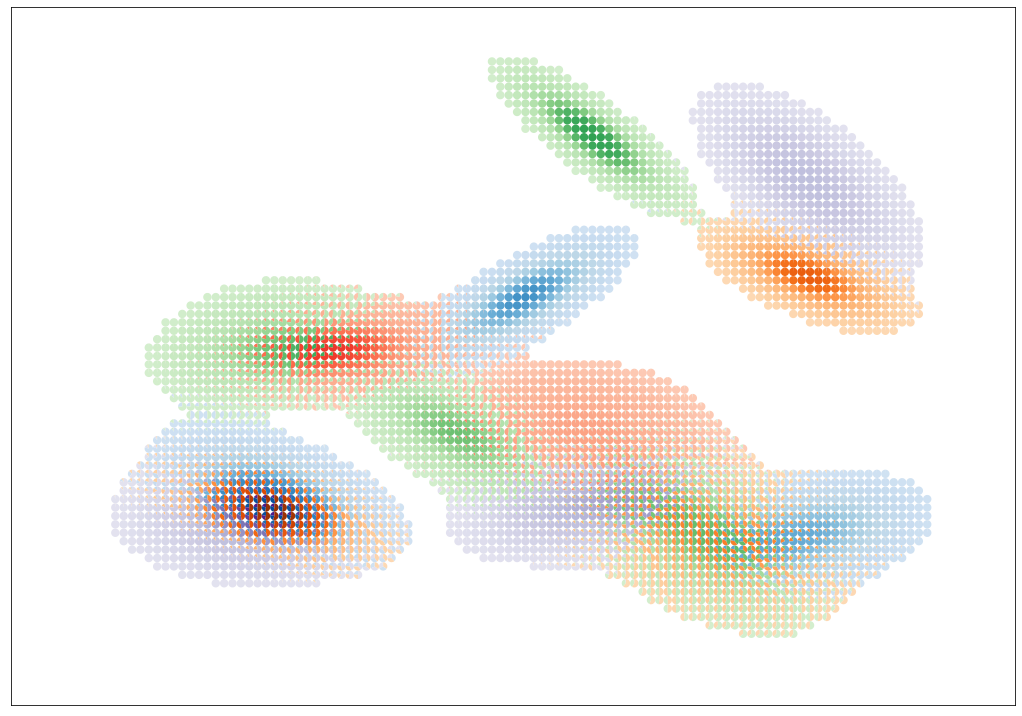

points in grid of z-coordinates too similar


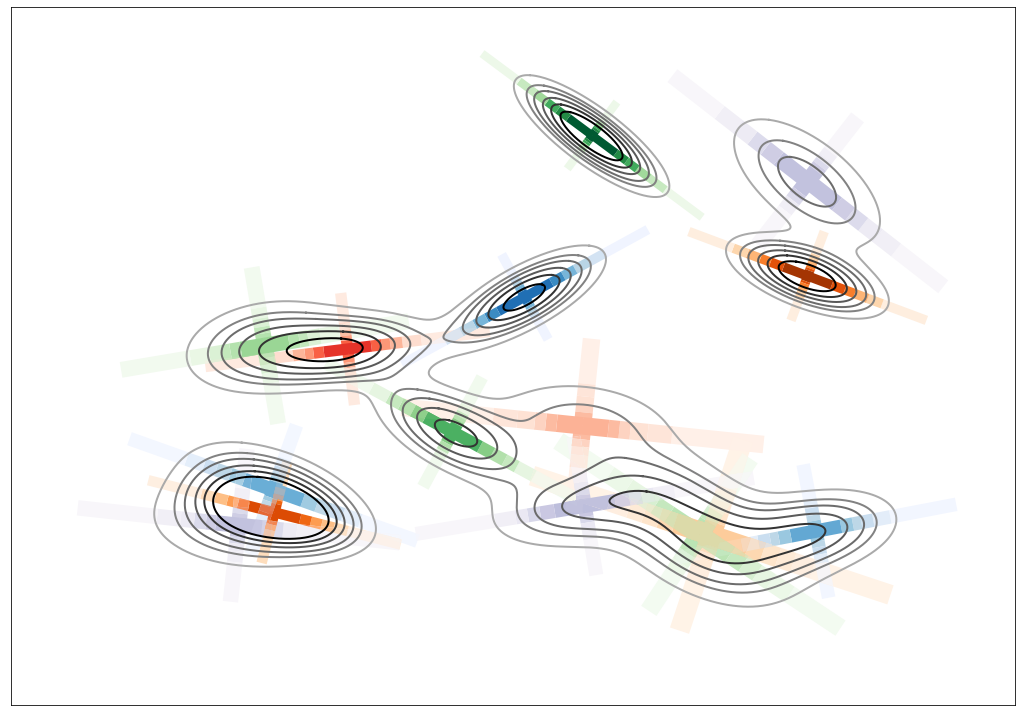

In [40]:
figures_15 = plot_images(gmm_15, colors_15, settings)

In [41]:
save_images(figures_15, "15_components", **fig_settings)

{'dpi': 500, 'bbox_inches': 'tight'}
15_components_contour.png
15_components_pie.png
15_components_cross.png


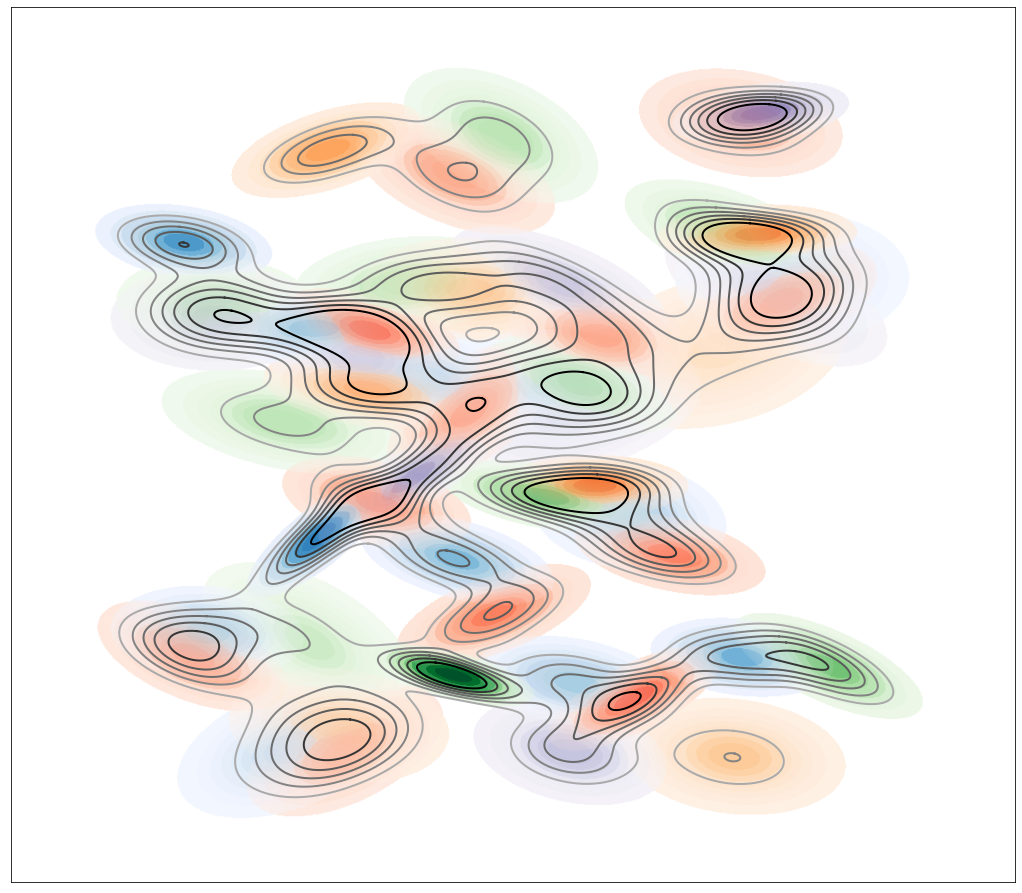

In [75]:
fig_contour_50, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm_50, contour_colorscheme=list(colors_50.values()), contours=True, contour_lines=True)

In [ ]:
fig_pie, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, pie_chart_colors=list(colors.values()), pie_charts=True, pie_num = 120, pie_angle=90, pie_chart_iso_level=40, pie_chart_contour_method="equal_density", pie_chart_modus="light")

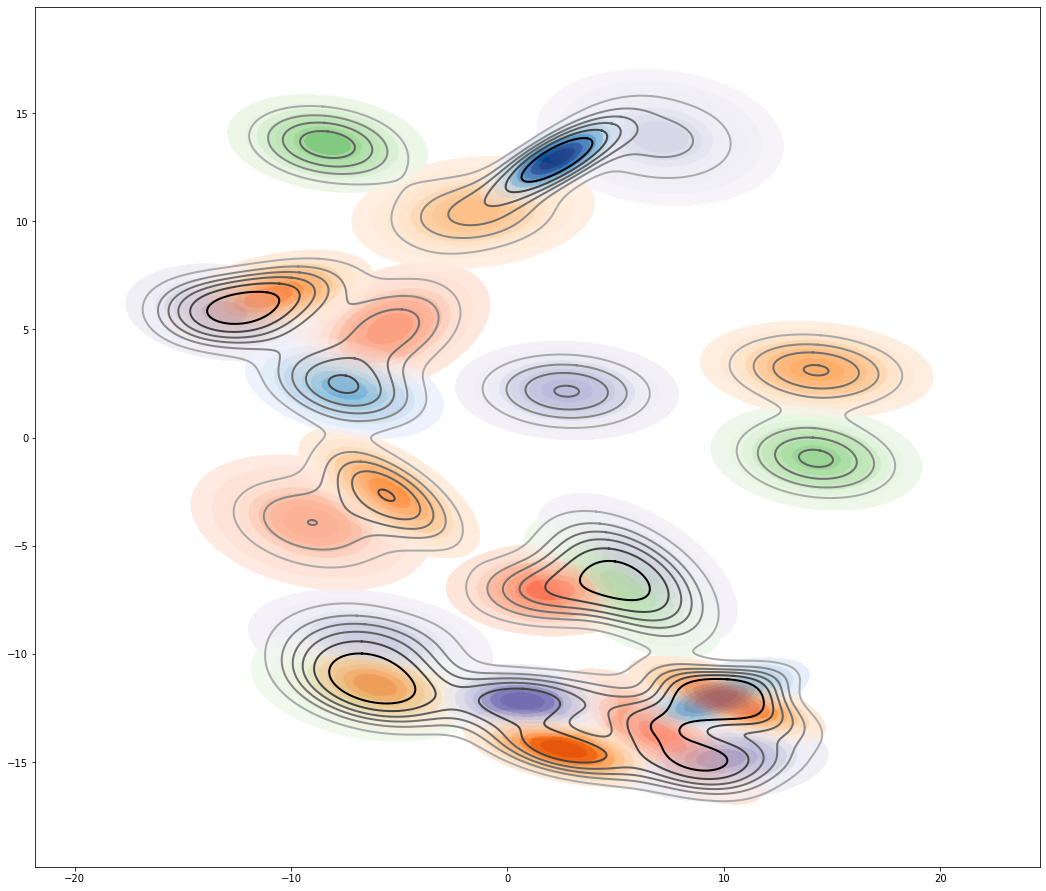

In [36]:
fig_contour_25, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm_25, contour_colorscheme=list(colors_25.values()), contours=True, contour_lines=True)

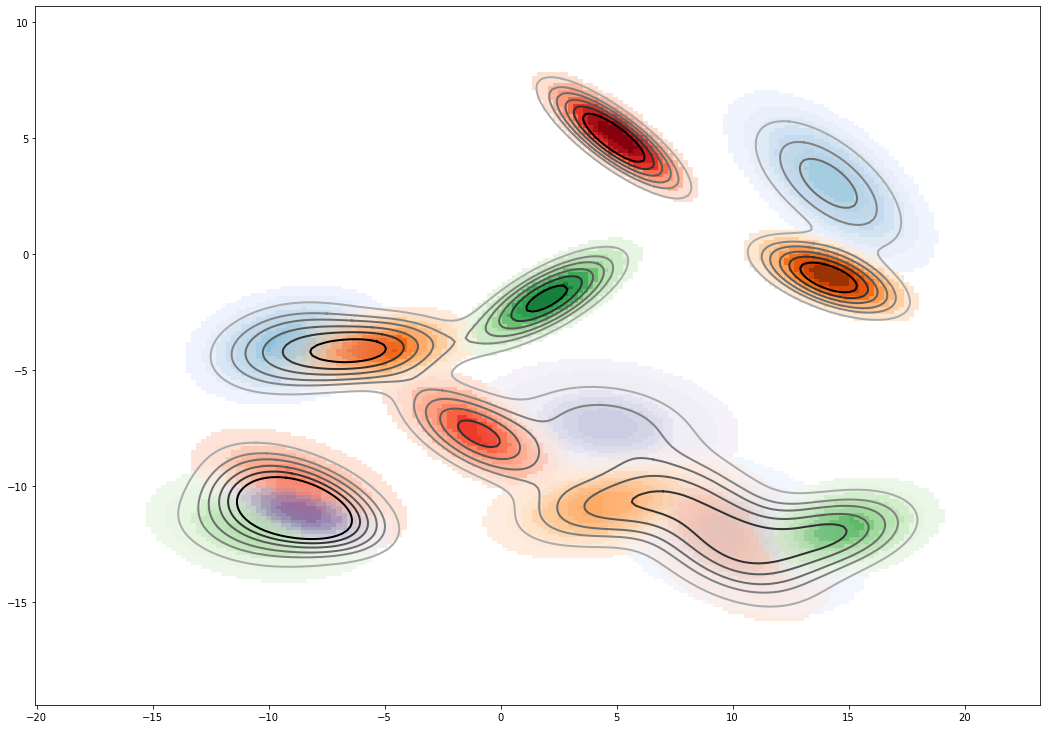

In [32]:
fig_contour_15, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
picture_plot.plot_image(ax, gmm_15, contour_colorscheme=list(colors_15.values()), contours=True, contour_lines=True)
